In [ ]:
import pandas as pd
import numpy as np

url='https://github.com/rajeevratan84/datascienceforbusiness/blob/master/president_polls.csv?raw=true'
df = pd.read_csv(url)
df

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,office_type,seat_number,seat_name,start_date,end_date,election_date,sponsor_candidate,internal,partisan,tracking,nationwide_batch,ranked_choice_reallocated,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,Rasmussen Reports/Pulse Opinion Research,C+,800.0,lv,lv,Automated Phone,U.S. President,0,NaN,10/18/20,10/19/20,11/3/20,NaN,False,NaN,NaN,False,False,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Biden,13256,Joseph R. Biden Jr.,DEM,48.0
1,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,Rasmussen Reports/Pulse Opinion Research,C+,800.0,lv,lv,Automated Phone,U.S. President,0,NaN,10/18/20,10/19/20,11/3/20,NaN,False,NaN,NaN,False,False,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Trump,13254,Donald Trump,REP,47.0
2,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,Rasmussen Reports/Pulse Opinion Research,C+,800.0,lv,lv,Automated Phone,U.S. President,0,NaN,10/18/20,10/19/20,11/3/20,NaN,False,NaN,NaN,False,False,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,50.0
3,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,Rasmussen Reports/Pulse Opinion Research,C+,800.0,lv,lv,Automated Phone,U.S. President,0,NaN,10/18/20,10/19/20,11/3/20,NaN,False,NaN,NaN,False,False,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Trump,13254,Donald Trump,REP,47.0
4,133777,71435,2020,Georgia,1102,Emerson College,1446,NewsNation,Emerson College,88.0,Emerson College,A-,506.0,lv,lv,IVR/Online,U.S. President,0,NaN,10/17/20,10/19/20,11/3/20,NaN,False,NaN,NaN,False,False,10/19/20 20:06,NaN,https://emersonpolling.reportablenews.com/pr/g...,general,6221,Biden,13256,Joseph R. Biden Jr.,DEM,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11904,92081,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,Public Policy Polling,B,648.0,v,v,Automated Phone,U.S. President,0,NaN,11/27/18,11/28/18,11/3/20,NaN,False,DEM,NaN,False,False,12/6/18 14:45,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,46.0
11905,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,Public Policy Polling,B,648.0,v,v,Automated Phone,U.S. President,0,NaN,11/27/18,11/28/18,11/3/20,NaN,False,DEM,NaN,False,False,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Warren,13258,Elizabeth Warren,DEM,43.0
11906,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,Public Policy Polling,B,648.0,v,v,Automated Phone,U.S. President,0,NaN,11/27/18,11/28/18,11/3/20,NaN,False,DEM,NaN,False,False,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,49.0
11907,92078,57025,2020,NaN,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,Rasmussen Reports/Pulse Opinion Research,C+,1000.0,lv,lv,IVR/Online,U.S. President,0,NaN,11/12/18,11/13/18,11/3/20,NaN,False,NaN,NaN,False,False,12/6/18 14:40,NaN,http://www.rasmussenreports.com/public_content...,general,6210,Obama,13253,Michelle Obama,DEM,50.0


## Let's see what we're working with in the dataset

In [ ]:
df.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'seat_number',
       'seat_name', 'start_date', 'end_date', 'election_date',
       'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'ranked_choice_reallocated', 'created_at', 'notes',
       'url', 'stage', 'race_id', 'answer', 'candidate_id', 'candidate_name',
       'candidate_party', 'pct'],
      dtype='object')

We won't need all of this for the simulation - let's just go ahead with the % results

In [ ]:
df = df[['question_id', 'poll_id', 'state', 'pollster', 'start_date', 'end_date', 'answer', 'pct']]
df.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
4,133777,71435,Georgia,Emerson College,10/17/20,10/19/20,Biden,47.0


In [ ]:
# How many pollsters? Let's print the length
print(len(df.pollster.unique()))

196


In [ ]:
df.start_date.unique()

array(['10/18/20', '10/17/20', '10/15/20', '10/13/20', '10/6/20',
       '10/16/20', '10/14/20', '10/5/20', '9/21/20', '9/20/20',
       '10/12/20', '10/4/20', '9/19/20', '10/3/20', '9/18/20', '10/11/20',
       '10/9/20', '10/2/20', '9/17/20', '10/10/20', '10/7/20', '10/1/20',
       '9/16/20', '10/8/20', '9/30/20', '9/15/20', '9/29/20', '9/14/20',
       '9/28/20', '9/27/20', '9/26/20', '9/25/20', '9/22/20', '9/24/20',
       '9/23/20', '9/1/20', '9/13/20', '9/12/20', '9/10/20', '9/11/20',
       '9/9/20', '9/8/20', '9/7/20', '9/6/20', '9/5/20', '9/4/20',
       '9/3/20', '9/2/20', '8/31/20', '8/29/20', '8/30/20', '8/28/20',
       '8/27/20', '8/26/20', '8/25/20', '8/24/20', '8/23/20', '8/22/20',
       '8/21/20', '8/20/20', '8/19/20', '8/18/20', '8/1/20', '8/17/20',
       '8/16/20', '8/15/20', '8/14/20', '8/13/20', '8/12/20', '8/11/20',
       '8/9/20', '8/10/20', '8/8/20', '8/7/20', '8/6/20', '8/5/20',
       '8/4/20', '8/3/20', '8/2/20', '7/31/20', '7/30/20', '7/28/20',
       '7

In [ ]:
# Do we need to convert any of the data types? 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   question_id  11909 non-null  int64  
 1   poll_id      11909 non-null  int64  
 2   state        7363 non-null   object 
 3   pollster     11909 non-null  object 
 4   start_date   11909 non-null  object 
 5   end_date     11909 non-null  object 
 6   answer       11909 non-null  object 
 7   pct          11909 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 744.4+ KB


In [ ]:
# Let's update the date columns to datetime format
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   question_id  11909 non-null  int64         
 1   poll_id      11909 non-null  int64         
 2   state        7363 non-null   object        
 3   pollster     11909 non-null  object        
 4   start_date   11909 non-null  datetime64[ns]
 5   end_date     11909 non-null  datetime64[ns]
 6   answer       11909 non-null  object        
 7   pct          11909 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 744.4+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Sanity check:
df.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0


## EDA and Cleaning

### Filter out older polls - just need most recent data

Let's work with polls that start or end between Aug 1st and Nov 2nd 2020. This gives us 3 monhts leading up to the Nov 2 Election Date

In [ ]:
start_date = '2020-08-01'
end_date = '2020-11-02'

# create mask as true or false boolean column
mask = (df['start_date'] >= start_date) & (df['end_date'] <= end_date) 
mask

0         True
1         True
2         True
3         True
4         True
         ...  
11904    False
11905    False
11906    False
11907    False
11908    False
Length: 11909, dtype: bool

In [ ]:
# let's update the df with our mask
df = df.loc[mask]
df.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0


In [ ]:
# We have some 3rd part candidates in our df. Let's just use Biden and Trump
df.answer.unique()

array(['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'West', 'Pence',
       'Harris', 'Blankenship', 'De La Fuente', 'La Riva', 'Pierce',
       'Kennedy', 'Simmons'], dtype=object)

In [ ]:
candidates = ['Trump', 'Biden']
df = df.loc[df['answer'].isin(candidates)]
df.answer.unique()

array(['Biden', 'Trump'], dtype=object)

In [ ]:
# check the revised data
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.00
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.00
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.00
...,...,...,...,...,...,...,...,...
5288,127307,67986,NaN,Morning Consult,2020-08-01,2020-08-03,Trump,42.00
5289,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,52.72
5290,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Trump,44.88
5291,132632,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,51.92


In [ ]:
# Each poll occupies two lines currently
df.loc[df['poll_id'] == 71450]

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0


In [ ]:
# Also we should not the national polls are labeled NaN, let's remove these NaN's as they aren't useful for the analysis
df = df[df['state'].notna()]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0
...,...,...,...,...,...,...,...,...
5272,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0
5273,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0
5274,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0
5275,127580,68116,Wisconsin,OnMessage Inc.,2020-08-02,2020-08-04,Biden,47.0


In [ ]:
len(df.poll_id.unique())

1062

## Updating the Data Layout

- we need to put the polls on a single line to make data processing easier

In [ ]:
# start our index from 1 instead of 0 so this can work
df.index = np.arange(1, len(df) + 1)

# create a join_index prefix for the new columns from the row below
df['join_index'] = df.index + 1
df['join_index']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1          2
2          3
3          4
4          5
5          6
        ... 
3198    3199
3199    3200
3200    3201
3201    3202
3202    3203
Name: join_index, Length: 3202, dtype: int64

In [ ]:
# let's get the odd rows 
odd_rows = df[df.index % 2 == 1]

# now we join them 
grouped = odd_rows.join(df, 'join_index', rsuffix=' second')
grouped

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,poll_id second,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,3
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,5
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4,7
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,8,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,9
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,10,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Biden,49.0,3194,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Trump,45.0,3195
3195,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Biden,48.0,3196,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Trump,51.0,3197
3197,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Biden,49.0,3198,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0,3199
3199,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0,3200,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0,3201


### Let's check ouf state names before moving forward 
We'll get rid of CD-1 and CD-2 states and just treat the poll as if it covered the whole state

In [ ]:
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-2'], dtype=object)

In [ ]:
grouped['state'] = grouped['state'].str.replace(r' CD-1', '')
grouped['state'] = grouped['state'].str.replace(r' CD-2', '')

In [ ]:
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska'], dtype=object)

### The US Electoral Process

USA Electoral Map
There are 538 seats and 270 to win
![alt text](https://classroommagazines.scholastic.com/content/dam/classroom-magazines/magazines/election/election-2020/civics-in-action/the-electoral-college/ELECTION_ELECTORALCOLLEGE_HEADER_MAP.jpg)

In [ ]:
# Dict file with all states and number of seats they have

states = {
    "Alabama": 9,
    "Alaska": 3,
    "Arizona": 11,
    "Arkansas": 6,
    "California": 55,
    "Colorado": 9,
    "Connecticut": 7,
    "Delaware": 3,
    "District of Columbia": 3,
    "Florida": 29,
    "Georgia": 16,
    "Hawaii": 4,
    "Idaho": 4,
    "Illinois": 20,
    "Indiana": 11,
    "Iowa": 6,
    "Kansas": 6,
    "Kentucky": 8,
    "Louisiana": 8,
    "Maine": 4,
    "Maryland": 10,
    "Massachusetts": 11,
    "Michigan": 16,
    "Minnesota": 10,
    "Mississippi": 6,
    "Missouri": 10,
    "Montana": 3,
    "Nebraska": 5,
    "Nevada": 6,
    "New Hampshire": 4,
    "New Jersey": 14,
    "New Mexico": 5,
    "New York": 29,
    "North Carolina": 15,
    "North Dakota": 3,
    "Ohio": 18,
    "Oklahoma": 7,
    "Oregon": 7,
    "Pennsylvania": 20,
    "Rhode Island": 4,
    "South Carolina": 9,
    "South Dakota": 3,
    "Tennessee": 11,
    "Texas": 38,
    "Utah": 6,
    "Vermont": 3,
    "Virginia": 13,
    "Washington": 12,
    "West Virginia": 5,
    "Wisconsin": 10,
    "Wyoming": 3,
}

### Adding columns, Trump, Biden and Seats to make our info cleaner

In [ ]:
def getBiden(row):
  return row['pct'] if row['answer'] == 'Biden' else row ['pct second']

def getTrump(row):
  return row['pct'] if row['answer'] == 'Trump' else row ['pct second']

def getSeats(row):
  return states[row['state']]

grouped['Biden'] = grouped.apply(getBiden, axis=1)
grouped['Trump'] = grouped.apply(getTrump, axis=1)
grouped['Seats'] = grouped.apply(getSeats, axis=1)

grouped.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,poll_id second,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second,Biden,Trump,Seats
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,3,48.0,47.0,18
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,5,50.0,47.0,20
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4,7,47.0,48.4,16
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,8,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,9,49.0,45.0,20
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,10,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,11,49.0,45.0,20


## Let's visualize the data we have

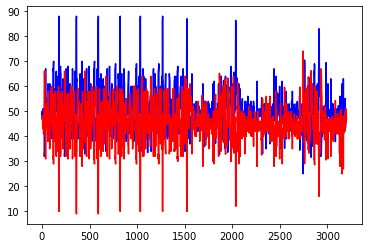

In [ ]:
import matplotlib.pyplot as plt

plt.plot(grouped.index, grouped['Biden'], color='blue')
plt.plot(grouped.index, grouped['Trump'], color='red')

This is not telling us much. Let's explore the difference

In [ ]:
## Let's plot the difference 
diff_by_date = grouped.groupby('start_date')['Biden', 'Trump'].mean().reset_index()
diff_by_date['difference'] = diff_by_date['Biden'] - diff_by_date['Trump']
diff_by_date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,start_date,Biden,Trump,difference
0,2020-08-01,50.142381,47.676381,2.466000
1,2020-08-02,48.800000,47.000000,1.800000
2,2020-08-03,49.500000,43.500000,6.000000
3,2020-08-04,47.916667,44.416667,3.500000
4,2020-08-05,47.661667,43.793333,3.868333
...,...,...,...,...
73,2020-10-14,50.866667,44.766667,6.100000
74,2020-10-15,48.800000,46.700000,2.100000
75,2020-10-16,47.100000,41.900000,5.200000
76,2020-10-17,47.000000,48.400000,-1.400000


In [ ]:
import plotly.express as px

fig = px.line(diff_by_date, x='start_date', y='difference', title='Biden vs Trump Difference')
fig.show()

We can see how the results are changing every day. A positive value means Biden is ahead. Most of the time it's above 0, which means Biden is ahead of Trump usually around 3-4%. Is this statistically significant?

### Tidying up the data

In [ ]:
polls = grouped[['state', 'pollster', 'end_date', 'Biden', 'Trump', 'Seats']]
polls.head()

,state,pollster,end_date,Biden,Trump,Seats
1,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,48.0,47.0,18
3,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,50.0,47.0,20
5,Georgia,Emerson College,2020-10-19,47.0,48.4,16
7,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20
9,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20


## Centers and Standard Deviations to our Averaged Polling Data

Lookin at the polls for each state, if you imagine that Trump voters are stacked on the top and the Biden voters are stacked up from the bottem, with folks who are undecided in between, then we can make the argument with a very simple model that positions the actual vote distributed around the average between the two. 

To keep things simple we'll use a normal distribution. 

For every state, we're going to create a normal dist from 0 to 100. The dist will be centered between the Biden vote and the Trump vote, and the standard deviation will be half the number of undecided votes plus 3.

![](https://i.imgur.com/Zl4iyoy.png)

In [ ]:
# Add the centers 

def get_center(row):
  """Example calculation, Biden is 48, Trump is 47
  48 + (100-47-47)/2 = 48 + 5/2 = 50.5"""

  return row['Biden'] + (100 - row['Trump'] - row['Biden']) / 2

polls['Center'] = polls.apply(get_center, axis=1)

# Add the deviations
def get_deviation(row):
  # sort of a guess for STD
  return (abs(row['Trump'] - row['Center']) / 2) + 3

polls['Stddev'] = polls.apply(get_deviation, axis=1)

polls

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,pollster,end_date,Biden,Trump,Seats,Center,Stddev
1,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,48.0,47.0,18,50.5,4.75
3,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,50.0,47.0,20,51.5,5.25
5,Georgia,Emerson College,2020-10-19,47.0,48.4,16,49.3,3.45
7,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20,52.0,6.50
9,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20,52.0,6.50
...,...,...,...,...,...,...,...,...
3193,Arizona,OH Predictive Insights,2020-08-04,49.0,45.0,11,52.0,6.50
3195,Arizona,OnMessage Inc.,2020-08-04,48.0,51.0,11,48.5,4.25
3197,Florida,OnMessage Inc.,2020-08-04,49.0,49.0,29,50.0,3.50
3199,Pennsylvania,OnMessage Inc.,2020-08-04,50.0,46.0,20,52.0,6.00


## Now let's go ahead and average all polls

This isn't necessarily the best method as it doesn't take into account the weighting to better polls and assumes all polls are equal. 

In a more advanced study we could use metrics like fte_grade, sample_size and methodology to weight polls.

In [ ]:
poll_state_summary = polls.groupby('state').mean().reset_index()
poll_state_summary

,state,Biden,Trump,Seats,Center,Stddev
0,Alabama,39.769048,57.161429,9,41.303810,10.928810
1,Alaska,44.020000,52.478636,3,45.770682,6.558523
2,Arizona,49.248514,45.155946,11,52.046284,6.552061
3,Arkansas,38.753684,58.801579,6,39.976053,12.412763
4,California,62.081923,33.621154,55,64.230385,18.304615
5,Colorado,55.022903,40.454194,9,57.284355,11.415081
6,Connecticut,62.420000,34.561111,7,63.929444,17.684167
7,Delaware,63.388500,33.953500,3,64.717500,18.382000
8,District of Columbia,86.283889,11.117222,3,87.583333,41.233056
9,Florida,48.740263,46.046842,29,51.346711,5.706118


### Simulation Time

- We're going to generate a random number from the distribution 
- If it's above 50, we'll say Biden won the state
- If it's below 50, we'll say Biden lost the state
- If Biden wins the state, he gets the number of electoral seats that state represents 
- If he doesn't win he get's nothing! 
- This will give us a nice series with numbers representing the electoral seats won from each state
- The output table below shows for each state (in each row) the number of seats Biden won. The column represents the results of one simulation.

In [ ]:
from numpy.random import normal

def run_election_simulation(times, polls):
    # Create a blank data frame to hold our results 
    result_frame = pd.DataFrame()

    def get_seats(row):
        # using the Normal Distriution function, we input the mean (center) and STD
        # if the result is great than 50, that indicates a win for Biden
        result = normal(row["Center"], row["Stddev"])
        return row["Seats"] if result > 50 else 0

    for i in range(times):
        result_frame[i] = polls.apply(get_seats, axis=1)

    return result_frame
    
# given an example of the output
res = run_election_simulation(10, poll_state_summary)
res.loc['Total',:] = res.sum(axis=0)

# Adding State Name to Results DF
res = pd.concat([poll_state_summary['state'], res], axis=1, sort=False)

# A 0.0 means Biden didn't win that seat, or that Trump won that seat
res

,state,0,1,2,3,4,5,6,7,8,9
0,Alabama,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0
1,Alaska,3.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2,Arizona,0.0,11.0,0.0,0.0,0.0,11.0,11.0,0.0,11.0,11.0
3,Arkansas,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,California,55.0,55.0,55.0,55.0,0.0,55.0,55.0,55.0,55.0,55.0
5,Colorado,9.0,9.0,9.0,0.0,9.0,0.0,9.0,9.0,9.0,0.0
6,Connecticut,7.0,0.0,7.0,7.0,7.0,7.0,7.0,0.0,7.0,7.0
7,Delaware,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
8,District of Columbia,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0
9,Florida,0.0,29.0,29.0,29.0,29.0,29.0,29.0,0.0,0.0,29.0


## Analyzing simulated results on a per state level

In [ ]:
# convert values to integers 

summary = pd.DataFrame((res == 0).astype(int).sum(axis=1))

# Add back states to leftmost column
res_summary = pd.concat([poll_state_summary['state'], summary], axis=1, sort=False)
res_summary.columns = ['state', 'trump_wins']

# Get % of times Trump won in the simulation
res_summary['percent_trump_wins'] = (res_summary['trump_wins'] / 10) * 100
res_summary

,state,trump_wins,percent_trump_wins
0,Alabama,8,80.0
1,Alaska,7,70.0
2,Arizona,5,50.0
3,Arkansas,8,80.0
4,California,1,10.0
5,Colorado,3,30.0
6,Connecticut,2,20.0
7,Delaware,2,20.0
8,District of Columbia,1,10.0
9,Florida,3,30.0


Let's get the sum of Biden's wins across the simulations

In [ ]:
res.loc['Total'][res.loc['Total'] > 270.0].count()

9

### Simulation - 10k

In [ ]:
number_of_simulations = 10000

election_results = run_election_simulation(number_of_simulations, poll_state_summary)
election_results.loc['Total',:] = election_results.sum(axis=0)

biden_wins = election_results.loc['Total'][election_results.loc['Total'] > 270.0].count()

# Print output
f"Joe Biden wins {biden_wins} times out of {number_of_simulations} simulations."

'Joe Biden wins 7944 times out of 10000 simulations.'

Statistically it looks like Biden will win. But we see Trump has a 1/5 chance. Anything could happen

### Let's now summarize it per state 


In [ ]:
summary = pd.DataFrame((election_results == 0).astype(int).sum(axis=1))
res_summary = pd.concat([poll_state_summary['state'], summary], axis=1, sort=False)
res_summary.columns = ['state', 'trump_wins']
res_summary['percent_trump_wins'] = (res_summary['trump_wins'] / number_of_simulations) * 100
res_summary['percent_biden_wins'] = 100 - res_summary['percent_trump_wins']
res_summary = res_summary.dropna()
res_summary.sort_values(by='trump_wins')

,state,trump_wins,percent_trump_wins,percent_biden_wins
8,District of Columbia,1813,18.13,81.87
21,Massachusetts,2019,20.19,79.81
11,Hawaii,2051,20.51,79.49
45,Vermont,2059,20.59,79.41
39,Rhode Island,2076,20.76,79.24
7,Delaware,2114,21.14,78.86
20,Maryland,2142,21.42,78.58
32,New York,2157,21.57,78.43
4,California,2169,21.69,78.31
6,Connecticut,2178,21.78,78.22


In [ ]:
res_summary.sort_values('percent_biden_wins', ascending=False).head(30)

,state,trump_wins,percent_trump_wins,percent_biden_wins
8,District of Columbia,1813,18.13,81.87
21,Massachusetts,2019,20.19,79.81
11,Hawaii,2051,20.51,79.49
45,Vermont,2059,20.59,79.41
39,Rhode Island,2076,20.76,79.24
7,Delaware,2114,21.14,78.86
20,Maryland,2142,21.42,78.58
32,New York,2157,21.57,78.43
4,California,2169,21.69,78.31
6,Connecticut,2178,21.78,78.22


In [ ]:
def getSeats(row):
  return states[row['state']]

res_summary['seats'] = res_summary.apply(getSeats, axis=1)

res_summary['seats_trump_wins'] = res_summary['percent_trump_wins'].apply(lambda x: 1 if x > 50 else 0)
res_summary['seats_trump_wins'] = res_summary['seats_trump_wins'] * res_summary['seats']

res_summary['seats_biden_wins'] = res_summary['percent_biden_wins'].apply(lambda x: 1 if x > 50 else 0)
res_summary['seats_biden_wins'] = res_summary['seats_biden_wins'] * res_summary['seats']
seats_trump_wins = res_summary['seats_trump_wins'].sum()
seats_biden_wins = res_summary['seats_biden_wins'].sum()

print(seats_biden_wins)
print(seats_trump_wins)
res_summary

350
188


,state,trump_wins,percent_trump_wins,percent_biden_wins,seats,seats_trump_wins,seats_biden_wins
0,Alabama,7925,79.25,20.75,9,9,0
1,Alaska,7418,74.18,25.82,3,3,0
2,Arizona,3897,38.97,61.03,11,0,11
3,Arkansas,7908,79.08,20.92,6,6,0
4,California,2169,21.69,78.31,55,0,55
5,Colorado,2628,26.28,73.72,9,0,9
6,Connecticut,2178,21.78,78.22,7,0,7
7,Delaware,2114,21.14,78.86,3,0,3
8,District of Columbia,1813,18.13,81.87,3,0,3
9,Florida,4065,40.65,59.35,29,0,29


## Creating a US Election Map

In [ ]:
## Create column that replaces state name abbreviation for plotly parameters
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

res_summary = res_summary.replace({"state": us_state_abbrev}) 
res_summary.head()

,state,trump_wins,percent_trump_wins,percent_biden_wins,seats,seats_trump_wins,seats_biden_wins
0,AL,7925,79.25,20.75,9,9,0
1,AK,7418,74.18,25.82,3,3,0
2,AZ,3897,38.97,61.03,11,0,11
3,AR,7908,79.08,20.92,6,6,0
4,CA,2169,21.69,78.31,55,0,55


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = res_summary['state'], # spatial coordinates 
    z = res_summary['percent_trump_wins'].astype(float), # data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Bluered',
    colorbar_title = 'Trump',
))

title = f'{number_of_simulations} Simulations of the 2020 US election showing Biden Winning {seats_biden_wins} and Trump winning {seats_trump_wins} Seats'
fig.update_layout(
    title_text = title, 
    geo_scope = 'usa',
)
fig.show()